# Contour Finder
### Cutting out the contours and finding the best contour in the image

## GOAL
* detect outline of each shape
* find centroid of each shape

## STEPS
1. convert the image to grayscale
2. blur the image to reduce high frequency noise and make contour detection accurate
3. Binarization of the image - thresholding

In [1]:
# importing the image
import imutils
import cv2

image = cv2.imread('contour.jpg')


In [13]:
import matplotlib.pyplot as plt
def show(image,cmap=None):
    plt.imshow(image,cmap=cmap)
    plt.show()

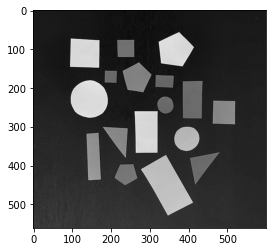

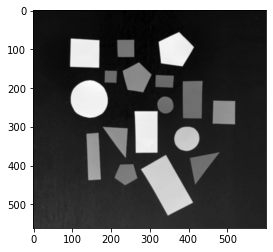

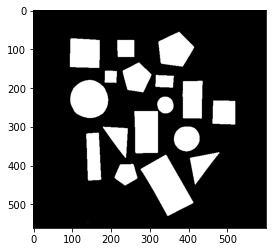

In [21]:
# converting the image to grayscale 
# blur the image
# threshold it
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
show(gray,cmap='gray')

# input, kernel size, border
blur = cv2.GaussianBlur(gray, (5,5), 0)
show(blur,cmap='gray')

# input, thresh, maxval, type
T, thresh = cv2.threshold(blur, 60, 255, cv2.THRESH_BINARY)
show(thresh,cmap='gray')


In [42]:
# finding the contours in the threshold image
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

In [45]:
# findContour - returns the outline that correspond to each of the white blobs on the image
# grab_contours - grabs the appropriate tuple value - based on opencv version used - cnts[0] works without imutils

In [46]:
len(cnts)
# cnts

18

In [1]:
# processing the contours 
# moments - to characterize the shape of the object in an image
# they contain basic statistical properties of the shape - Area, Centroid, Orientation, etc
# Plotting the contours 
# making circle in the center 
# putting the text 

green = (0,255,0)
white = (255,255,255)
for c in cnts:
    M = cv2.moments(c)
    try:
        cX = int(M['m10'] / M['m00'])
        cY = int(M['m01'] / M['m00'])

        cv2.drawContours(image, [c], -1, green, 2)
        cv2.circle(image, (cX,cY), 7, white, -1)
        cv2.putText(image, "center", (cX-20, cY-20), cv2.FONT_HERSHEY_SIMPLEX, 0.5, white, 2)

        show(image)
    except Exception as e:
        print(e)

NameError: name 'cnts' is not defined